# 2. 유니버설 함수

- ufunc라고 불리는 유니버설 함수는 ndarray 안에 있는 데이터 원소별로 연산을 수행하는 함수다. 
- 유니버설 함수는 하나 이상의 스칼라 값을 받아서 하나 이상의 스칼라 결과 값을 반환하는 간단한 함수를 고속으로 수행할 수 있는 벡터화된 래퍼 함수라고 생각하면 된다.
- 많은 ufunc는 sqrt나 exp 같은 간단한 변형을 전체 원소에 적용할 수 있다.

In [1]:
import numpy as np

In [2]:
arr = np.arange(10)
arr

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [4]:
np.sqrt(arr)

array([0.        , 1.        , 1.41421356, 1.73205081, 2.        ,
       2.23606798, 2.44948974, 2.64575131, 2.82842712, 3.        ])

In [5]:
np.exp(arr)

array([1.00000000e+00, 2.71828183e+00, 7.38905610e+00, 2.00855369e+01,
       5.45981500e+01, 1.48413159e+02, 4.03428793e+02, 1.09663316e+03,
       2.98095799e+03, 8.10308393e+03])

이런 함수를 단항 유니버설 함수라 한다.

- add나 maximum처럼 2개의 인자를 취해서 단일 배열을 반환하는 함수를 이항 유니버설 함수라고 한다.

In [3]:
x = np.random.randn(8)
y = np.random.randn(8)

In [4]:
x

array([-1.93807802, -0.75567897, -0.10444719, -0.74638213, -0.46163057,
        0.02399508, -1.84091679, -0.3442898 ])

In [5]:
y

array([ 5.03526546e-01,  4.63888571e-01,  1.07221764e+00,  2.04126920e-06,
       -4.34170863e-01,  3.81310440e-01, -3.05151472e-01,  7.10255256e-01])

In [6]:
np.maximum(x, y) # element-wise maximum 각각 비교해서 큰 애들만 모음

array([ 5.03526546e-01,  4.63888571e-01,  1.07221764e+00,  2.04126920e-06,
       -4.34170863e-01,  3.81310440e-01, -3.05151472e-01,  7.10255256e-01])

- 흔하지는 않지만 여러 개를 반환하는 유니버설 함수도 있다.
- modf는 파이썬 내장 함수인 divmod의 벡터화 버전이며, modf는 분수를 받아 몫과 나머지를 함께 반환한다.

In [2]:
arr = np.random.randn(7) * 5  #randn은 표준정규분포

In [3]:
arr

array([ 1.86178429, 12.22793451, -4.98337166, 12.15905388,  2.30051636,
       -3.13381738,  2.2273124 ])

In [4]:
np.modf(arr)   #몫과 나머지 함께 반환

(array([ 0.86178429,  0.22793451, -0.98337166,  0.15905388,  0.30051636,
        -0.13381738,  0.2273124 ]), array([ 1., 12., -4., 12.,  2., -3.,  2.]))

# 3. 배열을 사용한 데이터 처리

- NumPy 배열을 사용하면 반복문을 작성하지 않고 간결한 배열연산을 통해 많은 종류의 데이터 처리 작업을 할 수 있다.
- 배열연산을 사용해서 반복문을 명시적으로 제거하는 기법을 흔히 벡터화라고 부르는데, 일반적으로 벡터화된 배열에 대한 산술연산은 순수 파이썬 연산에 비해 2~3배에서 많게는 수십, 수백 배까지 빠르다.

In [7]:
points = np.arange(-5, 5, 0.01) # 1000 equally spaced points  #0.01씩 커지므로 10*100=1000개

In [8]:
xs, ys = np.meshgrid(points, points)

In [9]:
xs

array([[-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
       [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
       [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
       ...,
       [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
       [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
       [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99]])

In [10]:
ys

array([[-5.  , -5.  , -5.  , ..., -5.  , -5.  , -5.  ],
       [-4.99, -4.99, -4.99, ..., -4.99, -4.99, -4.99],
       [-4.98, -4.98, -4.98, ..., -4.98, -4.98, -4.98],
       ...,
       [ 4.97,  4.97,  4.97, ...,  4.97,  4.97,  4.97],
       [ 4.98,  4.98,  4.98, ...,  4.98,  4.98,  4.98],
       [ 4.99,  4.99,  4.99, ...,  4.99,  4.99,  4.99]])

In [11]:
xs,ys

(array([[-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
        [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
        [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
        ...,
        [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
        [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
        [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99]]),
 array([[-5.  , -5.  , -5.  , ..., -5.  , -5.  , -5.  ],
        [-4.99, -4.99, -4.99, ..., -4.99, -4.99, -4.99],
        [-4.98, -4.98, -4.98, ..., -4.98, -4.98, -4.98],
        ...,
        [ 4.97,  4.97,  4.97, ...,  4.97,  4.97,  4.97],
        [ 4.98,  4.98,  4.98, ...,  4.98,  4.98,  4.98],
        [ 4.99,  4.99,  4.99, ...,  4.99,  4.99,  4.99]]))

np.meshgrid 함수는 2개의 1차원 배열을 받아 가능한 한 모든 (x, y)짝을 만들 수 있는 2차원 배열 2개를 반환한다.

In [9]:
import matplotlib.pyplot as plt

In [10]:
z = np.sqrt(xs ** 2 + ys ** 2) #루트 50(=5^2+5^2)부터
z

array([[7.07106781, 7.06400028, 7.05693985, ..., 7.04988652, 7.05693985,
        7.06400028],
       [7.06400028, 7.05692568, 7.04985815, ..., 7.04279774, 7.04985815,
        7.05692568],
       [7.05693985, 7.04985815, 7.04278354, ..., 7.03571603, 7.04278354,
        7.04985815],
       ...,
       [7.04988652, 7.04279774, 7.03571603, ..., 7.0286414 , 7.03571603,
        7.04279774],
       [7.05693985, 7.04985815, 7.04278354, ..., 7.03571603, 7.04278354,
        7.04985815],
       [7.06400028, 7.05692568, 7.04985815, ..., 7.04279774, 7.04985815,
        7.05692568]])

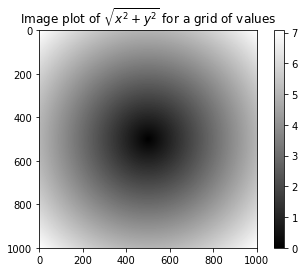

In [11]:
plt.imshow(z, cmap=plt.cm.gray); plt.colorbar()
plt.title("Image plot of $\sqrt{x^2 + y^2}$ for a grid of values")
plt.show()

## 3.1 배열연산으로 조건절 표현하기 (많이 씀)

- numpy.where 함수는 'x if 조건 else y' 같은 삼항식의 벡터화된 버전이다.

In [12]:
xarr = np.array([1.1, 1.2, 1.3, 1.4, 1.5])
yarr = np.array([2.1, 2.2, 2.3, 2.4, 2.5])
cond = np.array([True, False, True, True, False])

- cond의 값이 True일 때, xarr의 값이나 yarr의 값을 취하고 싶다면 리스트 내표를 이용해서 다음처럼 작성할 수 있다.

In [13]:
result = [(x if c else y)   #c가 true일때 x, false일때 y
         for x, y, c in zip(xarr, yarr, cond)]
result

[1.1, 2.2, 1.3, 1.4, 2.5]

- 이 방법은 순수 파이썬으로 수행되기 때문에 큰 배열을 빠르게 처리하지 못 한다는 것과 다차원 배열에서는 사용할 수 없다는 문제가 있다.
- np.where를 사용하면 아주 간결하게 작성할 수 있다.

In [14]:
result = np.where(cond, xarr, yarr)  #위와 같은 명령. R의 ifelse와 비슷한 명령
result

array([1.1, 2.2, 1.3, 1.4, 2.5])

- np.where의 두 번째와 세 번째 인자는 배열이 아니라도 괜찮다. 둘 중 하나 혹은 둘 다 스칼라 값이라도 동작한다.
- 데이터 분석에서 일반적인 where의 사용은 다른 배열에 기반한 새로운 배열을 생성한다.

- 임의로 생성된 데이터가 있는 행렬이 있고 양수는 모두 2로, 음수는 모두 -2로 바꾸려면 np.where를 이용해서 쉽게 처리할 수 있다.

In [15]:
arr = np.random.randn(4, 4)
arr

array([[ 1.30940408,  0.63773681,  0.42697593, -0.53560774],
       [ 1.65054953, -0.30363689,  0.3552512 ,  0.33022478],
       [-0.18322821, -1.08404923,  1.19356853,  0.63130208],
       [ 0.16468826,  0.07917342,  1.69620296,  2.1585708 ]])

In [16]:
np.where(arr > 0, 2, -2)

array([[ 2,  2,  2, -2],
       [ 2, -2,  2,  2],
       [-2, -2,  2,  2],
       [ 2,  2,  2,  2]])

In [17]:
np.where(arr > 0, 2, arr) # set only positive values to 2

array([[ 2.        ,  2.        ,  2.        , -0.53560774],
       [ 2.        , -0.30363689,  2.        ,  2.        ],
       [-0.18322821, -1.08404923,  2.        ,  2.        ],
       [ 2.        ,  2.        ,  2.        ,  2.        ]])

## 3.2 수학 메서드와 통계 메서드

- 배열 전체 혹은 배열에서 한 축에 따르는 자료에 대한 통계를 계산하기 위한 수학 함수는 배열 매서드로 사용할 수 있다.
- 전체의 합(sum)이나 평균(mean), 표준편차(std)는 NumPy의 최상위 함수를 이용하거나 배열의 인스턴스 메서드를 사용해서 구할 수 있다.

In [18]:
arr = np.random.randn(5, 4) # normally-distrivuted data

In [19]:
arr.mean()

-0.06942284269285644

In [20]:
np.mean(arr)

-0.06942284269285644

In [21]:
arr.sum()

-1.3884568538571287

- mean이나 sum 같은 함수는 선택적으로 axis 인자를 받아 해당 axis에 대한 통계를 계산하고 한 차수 낮은 배열을 반환한다.

In [22]:
arr

array([[-0.64090952,  0.26063783,  0.67860428,  0.92797564],
       [-0.22184707,  0.03380422,  0.88596787,  0.83906334],
       [ 0.25662007,  0.11399306, -1.66510879, -1.53575264],
       [ 0.31971405,  0.4146261 ,  1.38493712, -0.67367599],
       [-1.52188275, -1.59373286, -0.03983265,  0.38834184]])

In [27]:
arr[0][1]

0.26063782784993406

In [23]:
arr.mean(axis=1)  #axis가 1이면 행끼리 0이면 열끼리

array([ 0.30657706,  0.38424709, -0.70756207,  0.36140032, -0.69177661])

In [25]:
arr.mean(0)  #열끼리

array([-0.36166104, -0.15413433,  0.24891357, -0.01080956])

In [18]:
arr.sum(0)

array([ 1.88143475, -2.7424847 ,  2.21638521, -1.06081308])

- cumsum과 cumprod 메서드는 중간 계산 값을 담고 있는 배열을 반환한다.

In [29]:
arr = np.array([[0,1,2], [3,4,5], [6,7,8]])
arr

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [30]:
arr.cumsum(0)

array([[ 0,  1,  2],
       [ 3,  5,  7],
       [ 9, 12, 15]], dtype=int32)

In [31]:
arr.cumprod(1)

array([[  0,   0,   0],
       [  3,  12,  60],
       [  6,  42, 336]], dtype=int32)

## 3.3 불리언 배열을 위한 메서드

- 앞의 메서드에서 불리언 값은 1(True), 0(False)으로 취급된다.
- 따라서 불리언 배열에 대한 sum 메서드를 실행하면 True인 원소의 개수를 반환한다.

In [32]:
arr = np.random.randn(100)

In [33]:
arr

array([ 1.12540297, -0.27169221, -0.25309303,  0.42009945, -0.38312785,
        0.04765708, -0.42414074,  0.10661036, -1.12290704,  0.55179853,
        0.53676574,  1.47574026, -1.95055777, -2.0220029 ,  1.17805283,
       -0.00749519, -0.39159073, -2.13004687, -0.07979563, -0.57059861,
        0.09172304,  0.53703828,  1.22486129, -1.02351286,  0.41513592,
       -0.62486879, -0.34556678,  0.53051824,  0.59919253,  0.79800286,
       -0.1312013 ,  0.31596079, -2.24756527,  0.15087296,  1.98536579,
       -0.52902285,  1.29291202,  0.10840202,  0.58252992,  0.8005523 ,
        0.07710491,  0.87716858, -0.42225228,  0.60145816,  0.85971853,
       -0.70545254, -1.3389209 ,  2.02776289, -0.22478343,  0.88980047,
       -0.46077551, -0.69886873, -0.48291149, -0.89594931, -0.0347173 ,
        0.90721411,  1.80949795,  0.02999882, -0.38219017, -0.89569714,
       -1.13634989, -1.56810264,  1.6117348 , -0.29292182,  0.13011432,
       -0.07895672, -0.13420379, -1.69397221, -0.88222237, -0.89

In [22]:
(arr > 0).sum() # Number of positive values #0보다 큰 애들의 갯수 (그 조건인 애들 갯수임!! 합 아님)

45

- any, all 메서드는 불리언 배열에 사용할 때 특히 유용하다.
- any 메서드는 하나 이상의 True 값이 있는지 검사하고, all 메서드는 모든 원소가 True인지 검사한다.

In [51]:
bools = np.array([False, False, True, False])

In [52]:
bools.any()  #하나라도 true가 있으면 true

True

In [53]:
bools.all()  #모두 true인 건 아니니까 false

False

이 메서드는 불리언 배열이 아니어도 동작하며, 0이 아닌 원소는 모두 True로 간주한다.

## 3.4 정렬

- 파이썬의 내장 리스트형처럼 NumPy 배열 역시 sort 메서드를 이용해서 정렬할 수 있다.

In [34]:
arr = np.random.randn(8)
arr

array([-1.68094605, -2.0732983 ,  1.21237818,  0.51955803, -0.67804645,
        0.53845805, -0.87167954, -0.33642204])

In [35]:
arr.sort()
arr

array([-2.0732983 , -1.68094605, -0.87167954, -0.67804645, -0.33642204,
        0.51955803,  0.53845805,  1.21237818])

- 다차원 배열의 정렬은 sort 메서드에 넘긴 축의 값에 따라 1차원 부분을 정렬한다.

In [36]:
arr = np.random.randn(5, 3)
arr

array([[ 0.97923517, -0.38442232,  0.58581472],
       [-0.64400932, -0.42828798, -0.46022813],
       [-1.14712962,  1.97322695,  0.25526811],
       [ 0.73341558,  0.26351983,  2.83556372],
       [-1.48245447, -1.09705563,  0.41034675]])

In [37]:
arr.sort(1)  #각 행에 대해 sort해줌
arr

array([[-0.38442232,  0.58581472,  0.97923517],
       [-0.64400932, -0.46022813, -0.42828798],
       [-1.14712962,  0.25526811,  1.97322695],
       [ 0.26351983,  0.73341558,  2.83556372],
       [-1.48245447, -1.09705563,  0.41034675]])

- np.sort 메서드는 배열을 직접 변경하지 않고 정렬된 결과를 가지고 있는 복사본을 반환한다.
- 배열의 분위수를 구하는 쉽고 빠른 방법은 우선 배열을 정렬한 후에 특정 분위의 값을 선택하는 것이다.

In [60]:
large_arr = np.random.randn(1000)
large_arr.sort()
large_arr[int(0.05 * len(large_arr))] # 5% quantile

-1.7276667510491812

## 3.5 집합 함수

- NumPy는 1차원 ndarray를 위한 몇 가지 기본 집합연산을 제공한다.
- 아마도 가장 자주 사용되는 함수는 배열 내에서 중복된 원소를 제거하고 남은 원소를 정렬된 형태로 반환하는 np.unique일 것이다.

In [38]:
names = np.array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'])
np.unique(names)  #중복된 거는 한 번만 출력

array(['Bob', 'Joe', 'Will'], dtype='<U4')

In [64]:
sorted(set(names)) # 순수 파이썬만으로 np.unique를 구현했을 때

['Bob', 'Joe', 'Will']

In [40]:
ints = np.array([3, 3, 3, 2, 2, 1, 1, 4, 4])
np.unique(ints)

array([1, 2, 3, 4])

- np.in1d 함수는 2개의 배열을 인자로 받아 첫 번째 배열의 각 원소가 두 번째 배열의 원소를 포함하는지를 나타내는 불리언 배열을 반환한다.

In [65]:
values = np.array([6, 0, 0, 3, 2, 5, 6])
np.in1d(values, [2, 3, 6])  #values가 [2,3,6] 중 하나인지 각각 불리언 출력 

array([ True, False, False,  True,  True, False,  True])

# 4. 배열의 파일 입출력

NumPy는 디스크에서 텍스트나 바이너리 형식의 파일로부터 데이터를 불러오거나 저장할 수 있다.

## 4.1 배열을 바이너리 형식으로 디스크에 저장하기

- np.save와 np.load는 배열 데이터를 효과적으로 디스크에 저장하고 불러오는 함수다.
- 배열은 기본적으로 압축되지 않은 raw 바이너리 형식의 .npy 파일로 저장된다.

In [41]:
arr = np.arange(10)
np.save('some_array', arr)  #some_array라는 이름으로 arr 저장. 형식은 npy로 저장됨

- 저장되는 파일 경로가 .npy로 끝나지 않으면 자동적으로 확장자를 추가한다. 이렇게 저장된 배열은 np.load로 불러올 수 있다.

In [42]:
np.load('some_array.npy') #npy파일을 여는 방법

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

- np.savez 함수를 이용하면 여러 개의 배열을 압축된 형식으로 저장할 수 있는데, 저장하려는 배열은 키워드 인자 형태로 전달된다.
- npz 파일을 불러올 때는 각각의 배열을 언제라도 불러올 수 있게 사전 형식의 객체에 저장한다.

In [43]:
np.savez('array_archive.npz', a=arr, b=arr)
arch = np.load('array_archive.npz')
arch['b']   #키워드 쳐서 나오게

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

## 4.2 텍스트 파일 불러오기와 저장하기

- np.loadtxt 함수는 구분자를 지정하거나 특정 칼럼에 대한 변환 함수를 지정하거나 로우를 건너뛰는 등의 다양한 기능을 제공한다.

In [46]:
!cat array_ex.txt

'cat'은(는) 내부 또는 외부 명령, 실행할 수 있는 프로그램, 또는
배치 파일이 아닙니다.


In [ ]:
arr = np.loadtxt('array_ex.txt', delimiter=',')
arr

In [ ]: !cat array_ex.txt

0.580052,0.186730,1.040717,1.134411

0.194163,-0.636917,-0.938659,0.124094

-0.126410,0.268607,-0.695724,0.047428

-1.484413,0.004176,-0.744203,0.005487

2.302869,0.200131,1.670238,-1.881090

-0.193230,1.047233,0.482803,0.960334



In [ ]: arr = np.loadtxt('array_ex.txt', delimiter=',')

In [ ]: arr

Out[ ]:

array([[ 0.5801, 0.1867, 1.0407, 1.1344],

[ 0.1942, -0.6369, -0.9387, 0.1241],

[-0.1264, 0.2686, -0.6957, 0.0474],

[-1.4844, 0.0042, -0.7442, 0.0055],

[ 2.3029, 0.2001, 1.6702, -1.8811],

[-0.1932, 1.0472, 0.4828, 0.9603]])

여기서는 작동 안 되는데 위와 같은 기능임 